Prima di tutto abilitiamo l'estensione autoreload di Jupyter

In [1]:
%load_ext autoreload
%autoreload 2

# Esercizio: Dosaggio di un Farmaco

**Consideriamo il problema di dosare un farmaco**

Iniziamo modellando il comportamento per una sola dose

* La quantità $x_k$ del farmaco in circolo decade esponenzialmente
* ...Quindi la quantità di farmaco segue la ricorsione:

$$
x_{k+1} = \alpha x_k
$$

Il farmaco ha un'emi-vita di $m$ (si dimezza dopo $m$ passi):

* Quindi, poiché abbiamo che:

$$
x_{k+1} = \alpha x_k \Rightarrow \quad x_{m} = \alpha^m x_0
$$

* ...Il valore di $\alpha$ può essere ottenuto a partire dall'emi-vita come segue:

$$
\alpha^m = \frac{1}{2} \quad \Rightarrow \quad \alpha = \frac{1}{2}^{1/m} 
$$

**Nel modulo `sol.dd.py`, si definisca la classe:**

```python
class DrugDosage:
    def __init__(self, half_life):
        ...
    
    def __call__(self, x, k):
        ...
```

* Al momento della costruzione, viene fornito il valore dell'emi-vita $m$ (i.e. `half_life`)
* ...Il valore di $\alpha$ può essere ricavato di conseguenza
* Il metodo `__call__` deve calcolare il prossimo valore della ricorsione
* Si noti che lo stato in questo caso è uno scalare
* ...Quindi non è necessario usare un array di `numpy`

**Nella cella seguente:**

* Si utilizzi un ciclo per considerare valori di $m$ tra 1 e 8
* Per ogni valore di $m$ si simuli l'andamento della popolazione usando `sim.simulate`
  - Si utilizzi $x_0 = 1$ come valore iniziale (dose standard)
  - ...E si considerino 72 passi di simulazione (ore)
* Si disegni l'andamento utilizzando `sim.plot_sim`

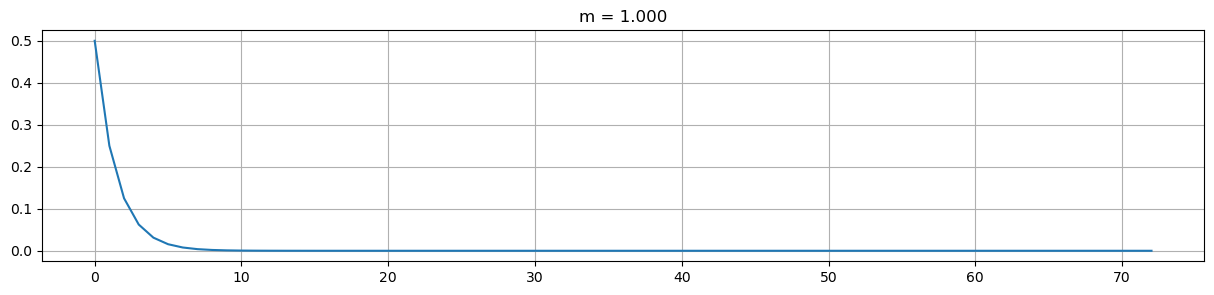

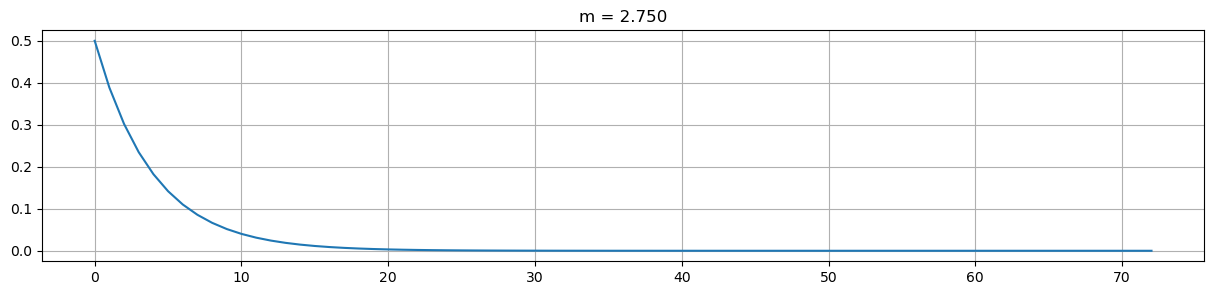

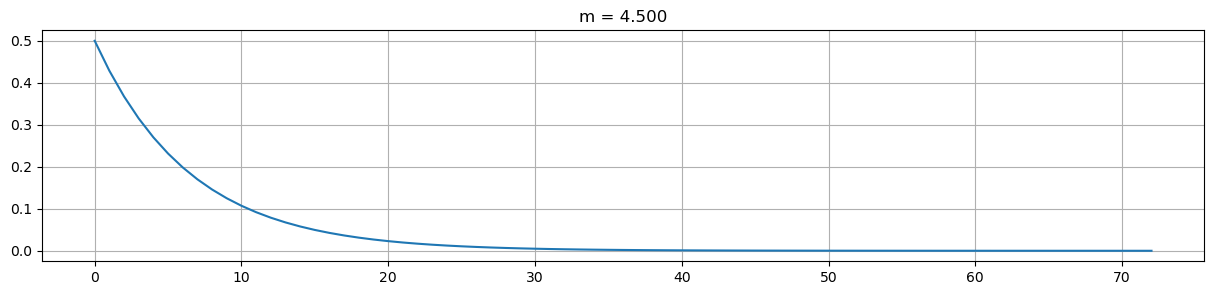

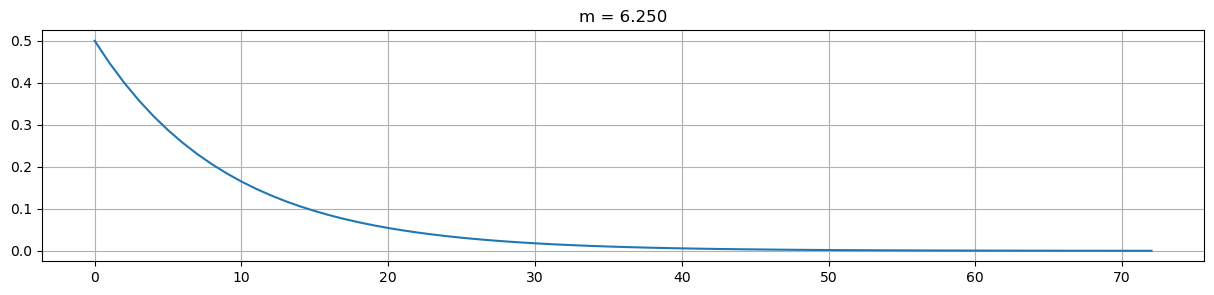

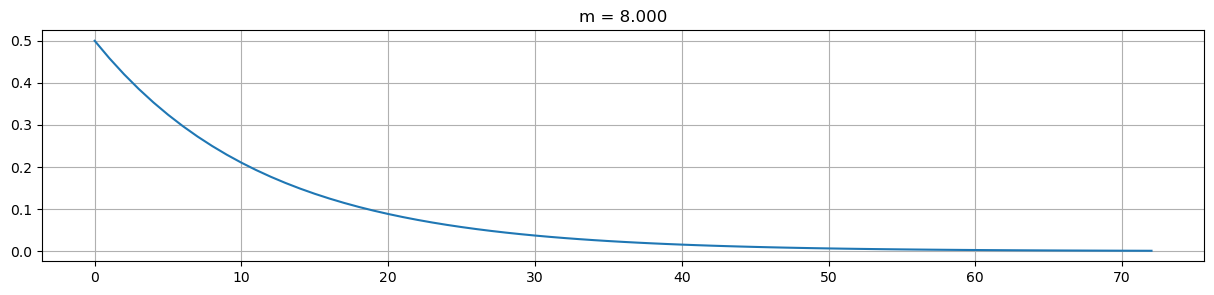

In [5]:
from sol import dd
from base import sim
import numpy as np

x0 = 1
n = 100

for m in np.linspace(1, 8, 5):
    f = dd.DrugDosage(half_life=m) # costruisco la funzione di transizione
    X = sim.simulate(f, x0, 72) # simulo
    sim.plot_sim(X, title=f"m = {m:.3f}")

**Si assuma che il farmaco venga ri-somministrato regolarmente**

* In particolare, ogni $t$ unità di tempo
* ...Viene assunta una nuova dose standard (i.e. 1)

Il comportamento è ora definito dalla ricorsione:

$$
x_{k+1} = \left\{\begin{aligned}
& \alpha x_k + 1& \text{se $k \mod t = 0$} \\
& \alpha x_k & \text{altrimenti}
\end{aligned}\right.
$$

**Nel modulo `sol.dd.py`, si definisca la classe:**

```python
class DrugDosage2:
    def __init__(self, half_life, repeat):
        ...
    
    def __call__(self, x, k):
        ...
```

* Al momento della costruzione, viene fornito il valore dell'emi-vita $m$ (i.e. `half_life`)
* ...E del periodo di riassuzione $t$ (i.e. repeat)
* Il metodo `__call__` deve calcolare il prossimo valore della ricorsione
* Si noti che lo stato in questo caso è uno scalare
* ...Quindi non è necessario usare un array di `numpy`

**Nella cella seguente:**

* Si assuma una emivita di 4 ore
* Si utilizzi un ciclo per considerare valori di $t$ tra 1 e 8
* Si noti che i valori di $t$ _devono essere interi_ per poter utilizzare l'operatore modulo
* Per ogni valore di $t$ si simuli l'andamento della popolazione usando `sim.simulate`
  - Si utilizzi $x_0 = 0$ come valore iniziale (dose standard)
  - ...E si considerino 72 passi di simulazione (ore)
* Si disegni l'andamento utilizzando `sim.plot_sim`

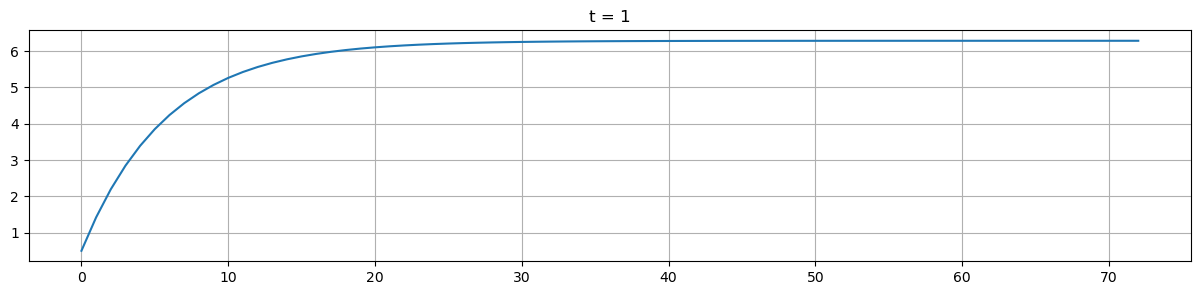

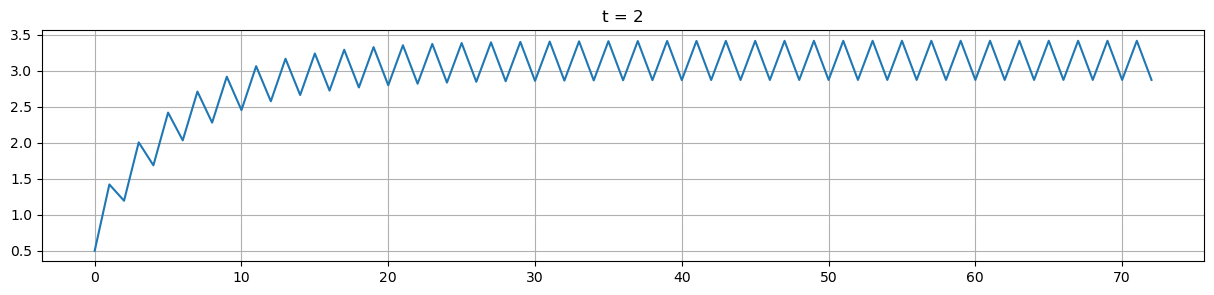

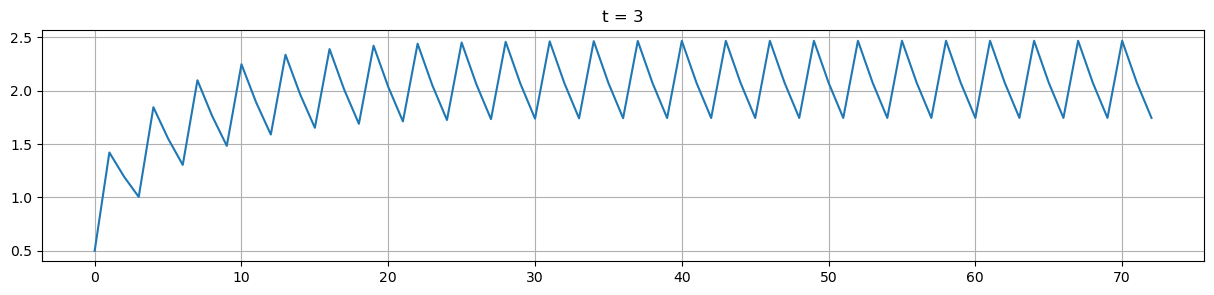

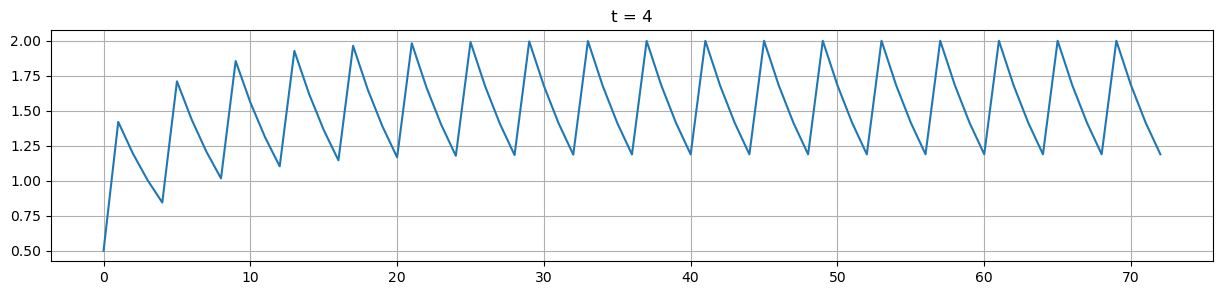

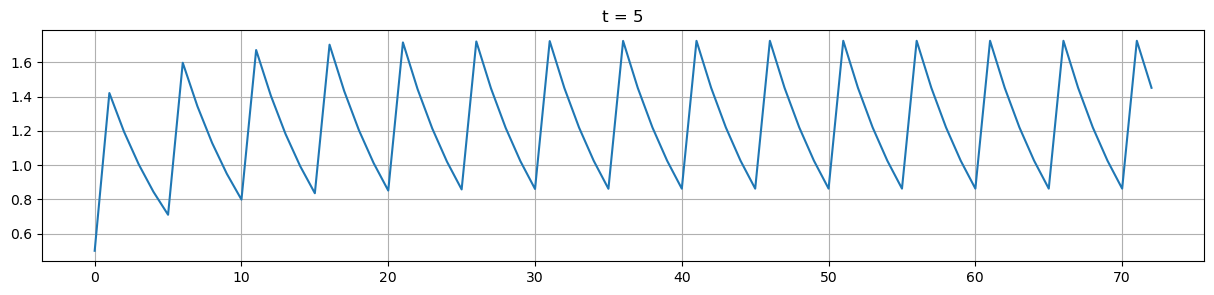

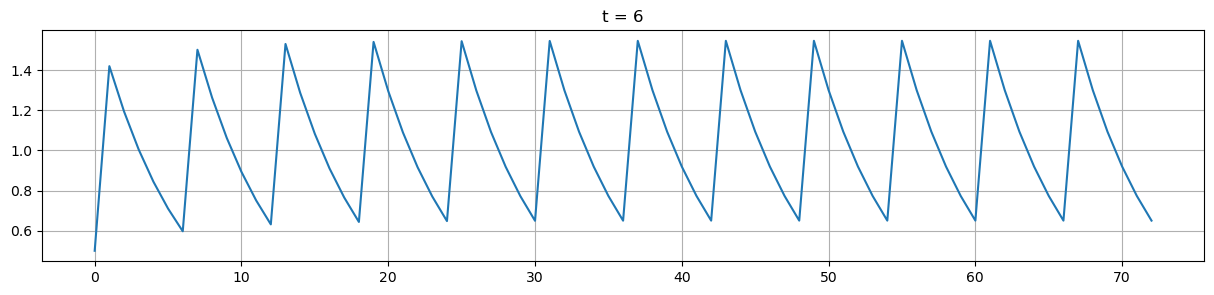

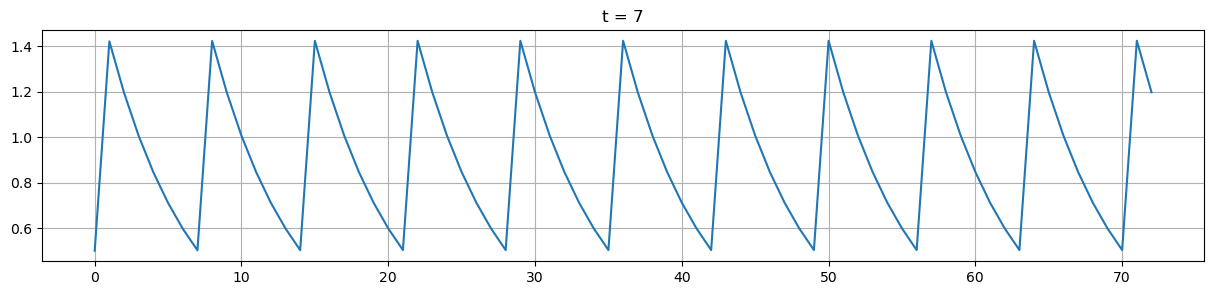

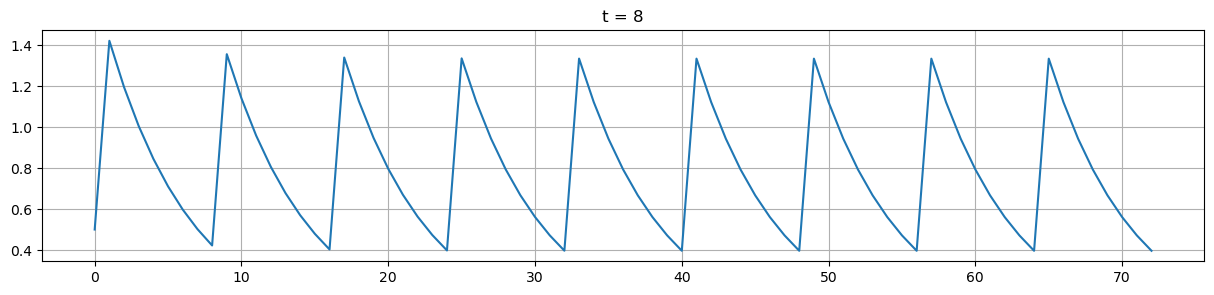

In [7]:
from sol import dd
from base import sim
import numpy as np

x0 = 0
n = 100
m = 4

for t in range(1, 9):
    f = dd.DrugDosage2(half_life=m, repeat=t) # costruisco la funzione di transizione
    X = sim.simulate(f, x0, 72) # simulo
    sim.plot_sim(X, title=f"t = {t}")